# **`Exploitary Data Analysis` ** 
may seems as  easy job.But it consist of several stages which enables to get good insights about the hidden Knowledge.

1. Data Loading 
2. Preprocessing (data cleaning,encoding,normalization and sometimes data reduction)
3. Features Extraction
4. Visualzation (relation b\w different features )
5. Dummy Classification (use of simple classiffier like SVM,Linear-Regression,Random-Forest in-order to learn about various places where it unables to learn i.e. loss and various factors which can affects the learning phase.



# **`TITANIC DATASET CHALLENGE`**

The Goal is to predict whether a person can survived based on attributes given.

In [1]:
import os
import numpy as np
import pandas as pd
TITANIC_PATH=os.path.join("datasets","titanic")


The Dataset consist of following attributes:

**PassengerId <br>
Survived <br>
Pclass <br>
Name <br>
Sex <br>
Age <br>
SibSp <br>
Parch <br>
Ticket <br>
Fare Cabins <br>
Embarked <br>**

# **1. `LOADING DATASET`**

In [3]:
def load_path(filename, titanic_path=TITANIC_PATH):
    csv_path = os.path.join(titanic_path, filename)
    return csv_path

def load_data(path):
    df=pd.read_csv(path)
    metadata=list(df.columns)
    return metadata,df

#train data
csv_path=load_path("train_titanic_data.csv")
features,dataframe=load_data(csv_path)

#test data
csv_path_test=load_path("test_titanic_data.csv")
features,data=load_data(csv_path_test)

print(features,end='\n')
dataframe.head()

['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Splitting data as `Survived or not` and  `Passenger Information`**

** 2.PREPROCESSING**

  1. `DATA CLEANING`

After Observing the data,it is clear that we need to do one hot encoding on categorical variable as well as data cleaning on missing data.

In [4]:
#Removing Uncessary Columns i.e Attributes like Cabin,Ticket and PassengerId
def drop_column(data,columns,copy=False):
    df=data
    if copy is True:
        df=data.copy()
        
    for i in columns:
        df.drop(i,axis=1,inplace=True)
    return df

drop_column(dataframe,columns=["Cabin","Ticket","PassengerId","Name"])
drop_column(data,columns=["Cabin","Ticket","PassengerId","Name"])
dataframe.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


In [5]:
#filling missing values

def fill_median(data,col,copy=False):
    df=data
    if copy is True:
        df=data.copy()
    med=df[col].median()
    df[col]=df[col].fillna(med)
    
    return df,med

def fill_default(data,col,value=0,copy=False):
    df=data
    if copy is True:
        df=data.copy()
    df[col].fillna(val)
    return df,val

#Add new columns

def add_column(data,col,value,copy=False):
    df=data
    if copy is True:
        df=data.copy()
    df.assign(col=value)
    
fill_median(dataframe,col=["Age"])  #filling missing values in Age Column
fill_median(data,col=["Age"])
print("")

In [6]:
print(dataframe[dataframe["Embarked"].isnull()])
dataframe=dataframe.dropna(axis=0,how="any",inplace=False) #removed entries with Nan value
data=data.dropna(axis=0,how="any",inplace=False)

     Survived  Pclass     Sex   Age  SibSp  Parch  Fare Embarked
61          1       1  female  38.0      0      0  80.0      NaN
829         1       1  female  62.0      0      0  80.0      NaN


In [7]:
dataframe.iloc[61]

Survived         0
Pclass           1
Sex           male
Age             45
SibSp            1
Parch            0
Fare        83.475
Embarked         S
Name: 62, dtype: object

2.` Encoding Categorical data and text attribute`

In [8]:
#Encoding Categorical Data into Numeric Data
from sklearn.preprocessing import LabelEncoder
def encode_category(data,col,copy=False):
    X=data
    if copy is True:
        X=data.copy()
    lb_make = LabelEncoder()
    X[col] = lb_make.fit_transform(X[col])
    return X


encode_category(dataframe,col="Sex")
encode_category(data,col="Sex")


encode_category(dataframe,col="Embarked")
encode_category(data,col="Embarked")
dataframe.head(3)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2


In [9]:
#Description about how data varies
dataframe.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,0.649044,29.315152,0.524184,0.382452,32.096681,1.535433
std,0.486260,0.834700,0.477538,12.984932,1.103705,0.806761,49.697504,0.792088
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,1.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [10]:
data.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000
mean,2.263789,0.635492,29.525180,0.448441,0.393285,35.627188,1.400480
std,0.842077,0.481870,12.628258,0.897568,0.982419,55.907576,0.855019
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,23.000000,0.000000,0.000000,7.895800,1.000000
50%,3.000000,1.000000,27.000000,0.000000,0.000000,14.454200,2.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.500000,2.000000
max,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,2.000000


In [11]:
dataframe.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.335549,-0.541585,-0.069822,-0.034040,0.083151,0.255290,-0.169718
Pclass,-0.335549,1.000000,0.127741,-0.336512,0.081656,0.016824,-0.548193,0.164681
Sex,-0.541585,0.127741,1.000000,0.086506,-0.116348,-0.247508,-0.179958,0.110320
Age,-0.069822,-0.336512,0.086506,1.000000,-0.232543,-0.171485,0.093707,-0.020933
SibSp,-0.034040,0.081656,-0.116348,-0.232543,1.000000,0.414542,0.160887,0.068900
Parch,0.083151,0.016824,-0.247508,-0.171485,0.414542,1.000000,0.217532,0.040449
Fare,0.255290,-0.548193,-0.179958,0.093707,0.160887,0.217532,1.000000,-0.226311
Embarked,-0.169718,0.164681,0.110320,-0.020933,0.068900,0.040449,-0.226311,1.000000


4. `Data Visualization`

In [12]:
#Data Visualization
import  matplotlib.pyplot as plt
%matplotlib inline


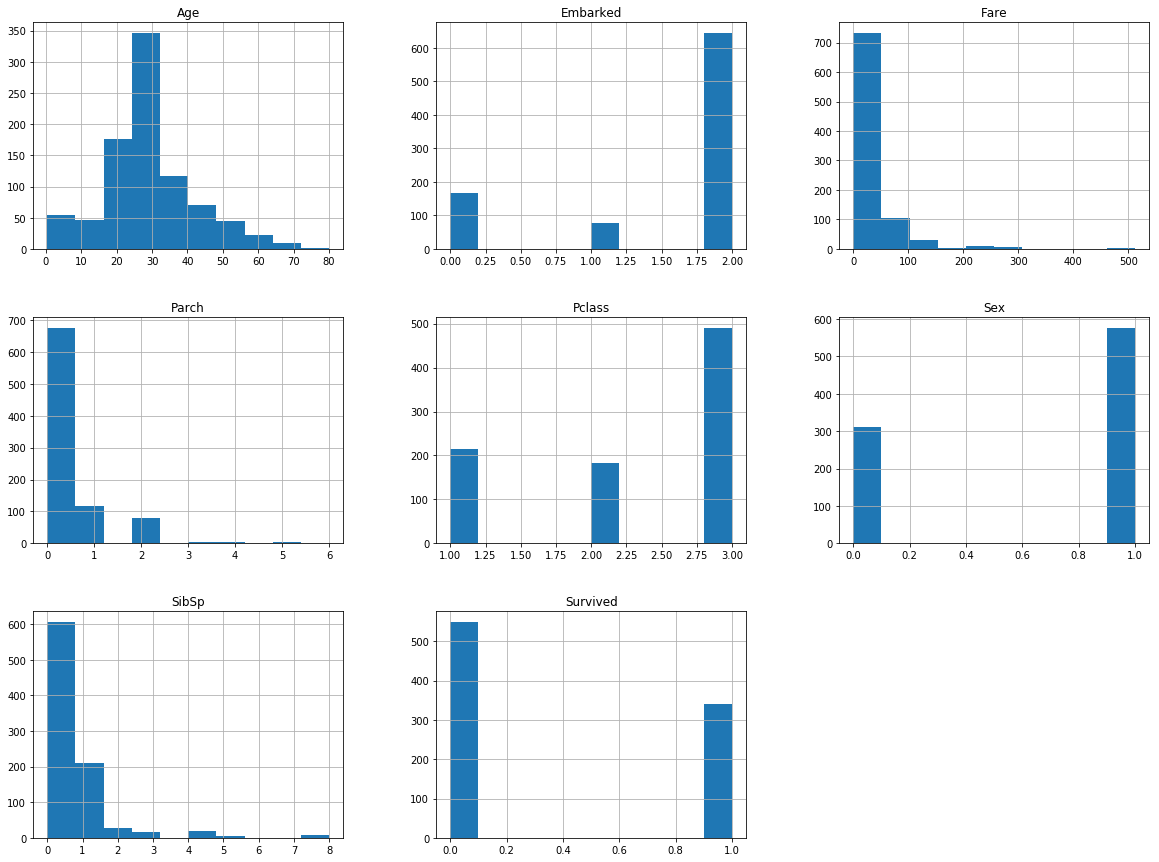

In [13]:
dataframe.hist(figsize=(20,15))
plt.show()

# Creating data for ML

In [14]:
#creating for train data
y=pd.DataFrame(dataframe["Survived"],columns=["Survived"])
X=dataframe.copy()
X.drop("Survived",axis=1,inplace=True) #Removing Survival Column

#Creating test data
X_=data.copy()



# *`LINEAR REGRESSION`*

In [20]:
#Linear Regression
from sklearn.linear_model import LinearRegression

clf = LinearRegression()
clf.fit(X,y)

#Prediction
pred  = clf.predict(X_)
mean_ = pred.mean()

pred[ pred<mean_  ] = 0         #so that all values above threshold  means survived or else not survived
pred[ pred>=mean_ ] = 1

y_pred = pred

In [24]:
from sklearn.metrics import accuracy_score,f1_score
acc=f1_score(y_pred,ytest)
print(acc)

ValueError: Found input variables with inconsistent numbers of samples: [417, 889]

In [43]:
xtest=X_.assign(Survived=y_pred)
xtest['Survived'] = xtest['Survived'].apply(lambda x: str(x))
info = pd.DataFrame(xtest,columns=["Survived","Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"])
info.to_csv(load_path("Survival_Prediction", titanic_path=TITANIC_PATH))

In [44]:
info.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,1,34.5,0,0,7.8292,1
1,1.0,3,0,47.0,1,0,7.0000,2
2,0.0,2,1,62.0,0,0,9.6875,1


# *`K- NEAREST NEIGHBORS`*

In [46]:
#K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
clf_k = KNeighborsClassifier(n_neighbors=3,weights="distance")
clf_k.fit(X,y)

#Prediction
pred = clf_k.predict(X_)
xtest2=X_.assign(Survived=pred)
info = pd.DataFrame(xtest2,columns=["Survived","Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"])
info.to_csv(load_path("Survival_Prediction2.csv", titanic_path=TITANIC_PATH))


C:\Users\Sachin Bisht\Miniconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


 Expecting Suggestions for fellow people regarding imporovement and advice

# **` END`**

In [17]:
data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2
5,3,1,14.0,0,0,9.2250,2
6,3,0,30.0,0,0,7.6292,1
7,2,1,26.0,1,1,29.0000,2
8,3,0,18.0,0,0,7.2292,0
9,3,1,21.0,2,0,24.1500,2
